# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

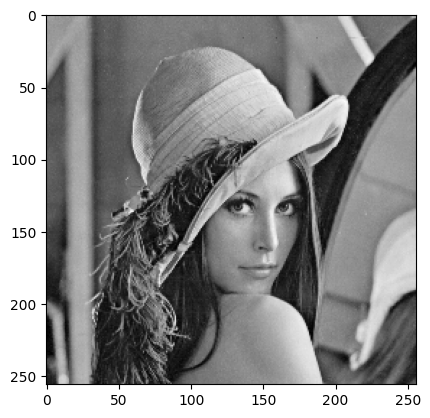

In [4]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [21]:
def meanfilter(img, size):
    img_mean = img.copy()
    result = numpy.zeros(img_mean.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_mean.shape):
        neighborhood_sum = 0
        r = p[0]
        c = p[1]
        if r > (0 + n) and c > (0 + n) and r < (img_mean.shape[0]-n) and c < (img_mean.shape[1]-n):
            for q in numpy.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                neighborhood_sum += img_mean[r2, c2]
        result[r, c] = (neighborhood_sum)/(size ** 2)
    
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

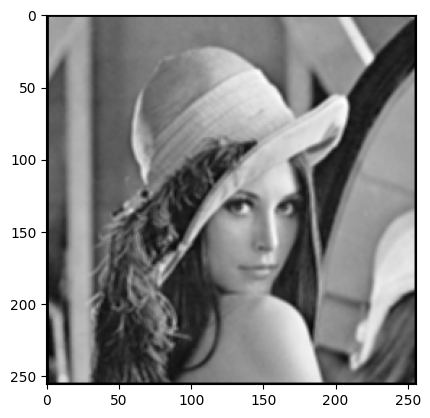

In [23]:
plt.imshow(meanfilter(img, 3), 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [ ]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    # write your code here
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: